In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("../../dataset/train_labels.csv")
df.head()

filename  width  height        class  xmin  \
0       cherry-tree-leaves-and-fruits.jpg    350     300  Cherry leaf   198   
1       cherry-tree-leaves-and-fruits.jpg    350     300  Cherry leaf     3   
2       cherry-tree-leaves-and-fruits.jpg    350     300  Cherry leaf    30   
3       cherry-tree-leaves-and-fruits.jpg    350     300  Cherry leaf   226   
4  peach-and-leaf-stock-image-2809275.jpg   1300    1099   Peach leaf   237   

   ymin  xmax  ymax  
0    77   299   252  
1   114   148   235  
2   184   189   297  
3     4   346    83  
4   479   527   810

In [3]:
df[df['width'] == 0]

filename  width  height  \
105   2f73110f80014a25a53f9551c94bf164.png.jpg      0       0   
5426                  SouthernRustLeaf.png.jpg      0       0   
5926          ppth-friskop-1-corn-rust.png.jpg      0       0   
6817                     southernrust1.png.jpg      0       0   

                    class  xmin  ymin  xmax  ymax  
105   Corn Gray leaf spot    58    92   525   386  
5426       Corn rust leaf     1   142   664   349  
5926       Corn rust leaf    78     1   566   192  
6817       Corn rust leaf    55     1   430   628

In [4]:
df[df['height'] == 0]

filename  width  height  \
105   2f73110f80014a25a53f9551c94bf164.png.jpg      0       0   
5426                  SouthernRustLeaf.png.jpg      0       0   
5926          ppth-friskop-1-corn-rust.png.jpg      0       0   
6817                     southernrust1.png.jpg      0       0   

                    class  xmin  ymin  xmax  ymax  
105   Corn Gray leaf spot    58    92   525   386  
5426       Corn rust leaf     1   142   664   349  
5926       Corn rust leaf    78     1   566   192  
6817       Corn rust leaf    55     1   430   628

In [5]:
## Automatic change if w or h = 0
import os
import xml.etree.ElementTree as ET
from PIL import Image

folder = "../../dataset/train"

for xml_file in os.listdir(folder):
    if not xml_file.endswith(".xml"):
        continue

    xml_path = os.path.join(folder, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # get filename
    filename = root.find("filename").text
    img_path = os.path.join(folder, filename)

    if not os.path.exists(img_path):
        print(f"⚠️ Image not found: {img_path}")
        continue

    # open image to get size
    with Image.open(img_path) as img:
        width, height = img.size

    size_tag = root.find("size")
    if size_tag is not None:
        size_tag.find("width").text = str(width)
        size_tag.find("height").text = str(height)
    else:
        # create <size> if missing
        size_tag = ET.SubElement(root, "size")
        ET.SubElement(size_tag, "width").text = str(width)
        ET.SubElement(size_tag, "height").text = str(height)
        ET.SubElement(size_tag, "depth").text = "3"

    tree.write(xml_path)


⚠️ Image not found: ../../dataset/train/NCLB.jpg
⚠️ Image not found: ../../dataset/train/early-blight-1.jpg
⚠️ Image not found: ../../dataset/train/powdery-mildew-on-squash-leaves.jpg


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  8469 non-null   object
 1   width     8469 non-null   int64 
 2   height    8469 non-null   int64 
 3   class     8469 non-null   object
 4   xmin      8469 non-null   int64 
 5   ymin      8469 non-null   int64 
 6   xmax      8469 non-null   int64 
 7   ymax      8469 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 529.4+ KB


In [7]:
df["class"].unique()

array(['Cherry leaf', 'Peach leaf', 'Corn leaf blight', 'Apple rust leaf',
       'Potato leaf late blight', 'Strawberry leaf', 'Corn rust leaf',
       'Tomato leaf late blight', 'Tomato mold leaf',
       'Potato leaf early blight', 'Apple leaf',
       'Tomato leaf yellow virus', 'Blueberry leaf',
       'Tomato leaf mosaic virus', 'Raspberry leaf',
       'Tomato leaf bacterial spot', 'Squash Powdery mildew leaf',
       'grape leaf', 'Corn Gray leaf spot', 'Tomato Early blight leaf',
       'Apple Scab Leaf', 'Tomato Septoria leaf spot', 'Tomato leaf',
       'Soyabean leaf', 'Bell_pepper leaf spot', 'Bell_pepper leaf',
       'grape leaf black rot', 'Potato leaf',
       'Tomato two spotted spider mites leaf'], dtype=object)

In [8]:
distribution = df["class"].value_counts(normalize=True).reset_index()
distribution

class  proportion
0                         Blueberry leaf    0.097650
1               Tomato leaf yellow virus    0.092927
2                             Peach leaf    0.072027
3                         Raspberry leaf    0.063644
4                        Strawberry leaf    0.054552
5              Tomato Septoria leaf spot    0.048648
6                            Tomato leaf    0.043571
7                       Corn leaf blight    0.042508
8               Potato leaf early blight    0.037313
9                       Bell_pepper leaf    0.036840
10                      Tomato mold leaf    0.032708
11            Tomato leaf bacterial spot    0.031409
12            Squash Powdery mildew leaf    0.029638
13                 Bell_pepper leaf spot    0.029401
14                         Soyabean leaf    0.029047
15               Potato leaf late blight    0.028339
16                            Apple leaf    0.027984
17              Tomato leaf mosaic virus    0.026567
18                           Cherry leaf    0.026095
19               Tomato leaf late blight    0.024442
20                            grape leaf    0.024206
21              Tomato Early blight leaf    0.023025
22                       Apple rust leaf    0.019837
23                       Apple Scab Leaf    0.018656
24                  grape leaf black rot    0.014760
25                        Corn rust leaf    0.013815
26                   Corn Gray leaf spot    0.008856
27                           Potato leaf    0.001299
28  Tomato two spotted spider mites leaf    0.000236

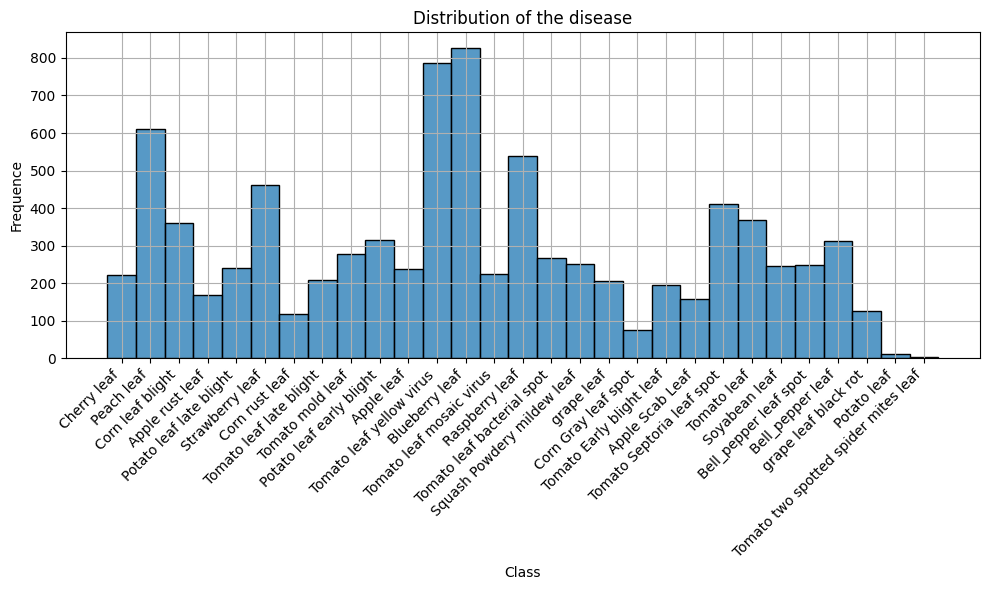

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df["class"])
plt.title("Distribution of the disease")
plt.xlabel("Class")
plt.ylabel("Frequence")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

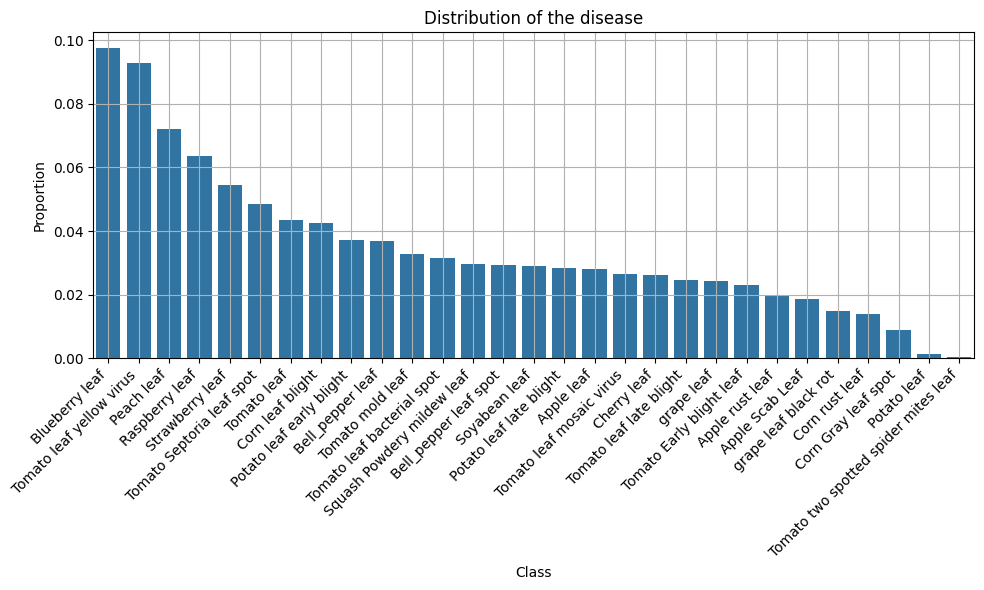

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(distribution, x='class', y='proportion')
plt.title("Distribution of the disease")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import os
import random
from PIL import Image
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [12]:
dataset_dir = "../../dataset/train"
all_images = [f for f in os.listdir(dataset_dir) if f.endswith(".jpg")]

# select 30 random images
sample_images = random.sample(all_images, min(30, len(all_images)))

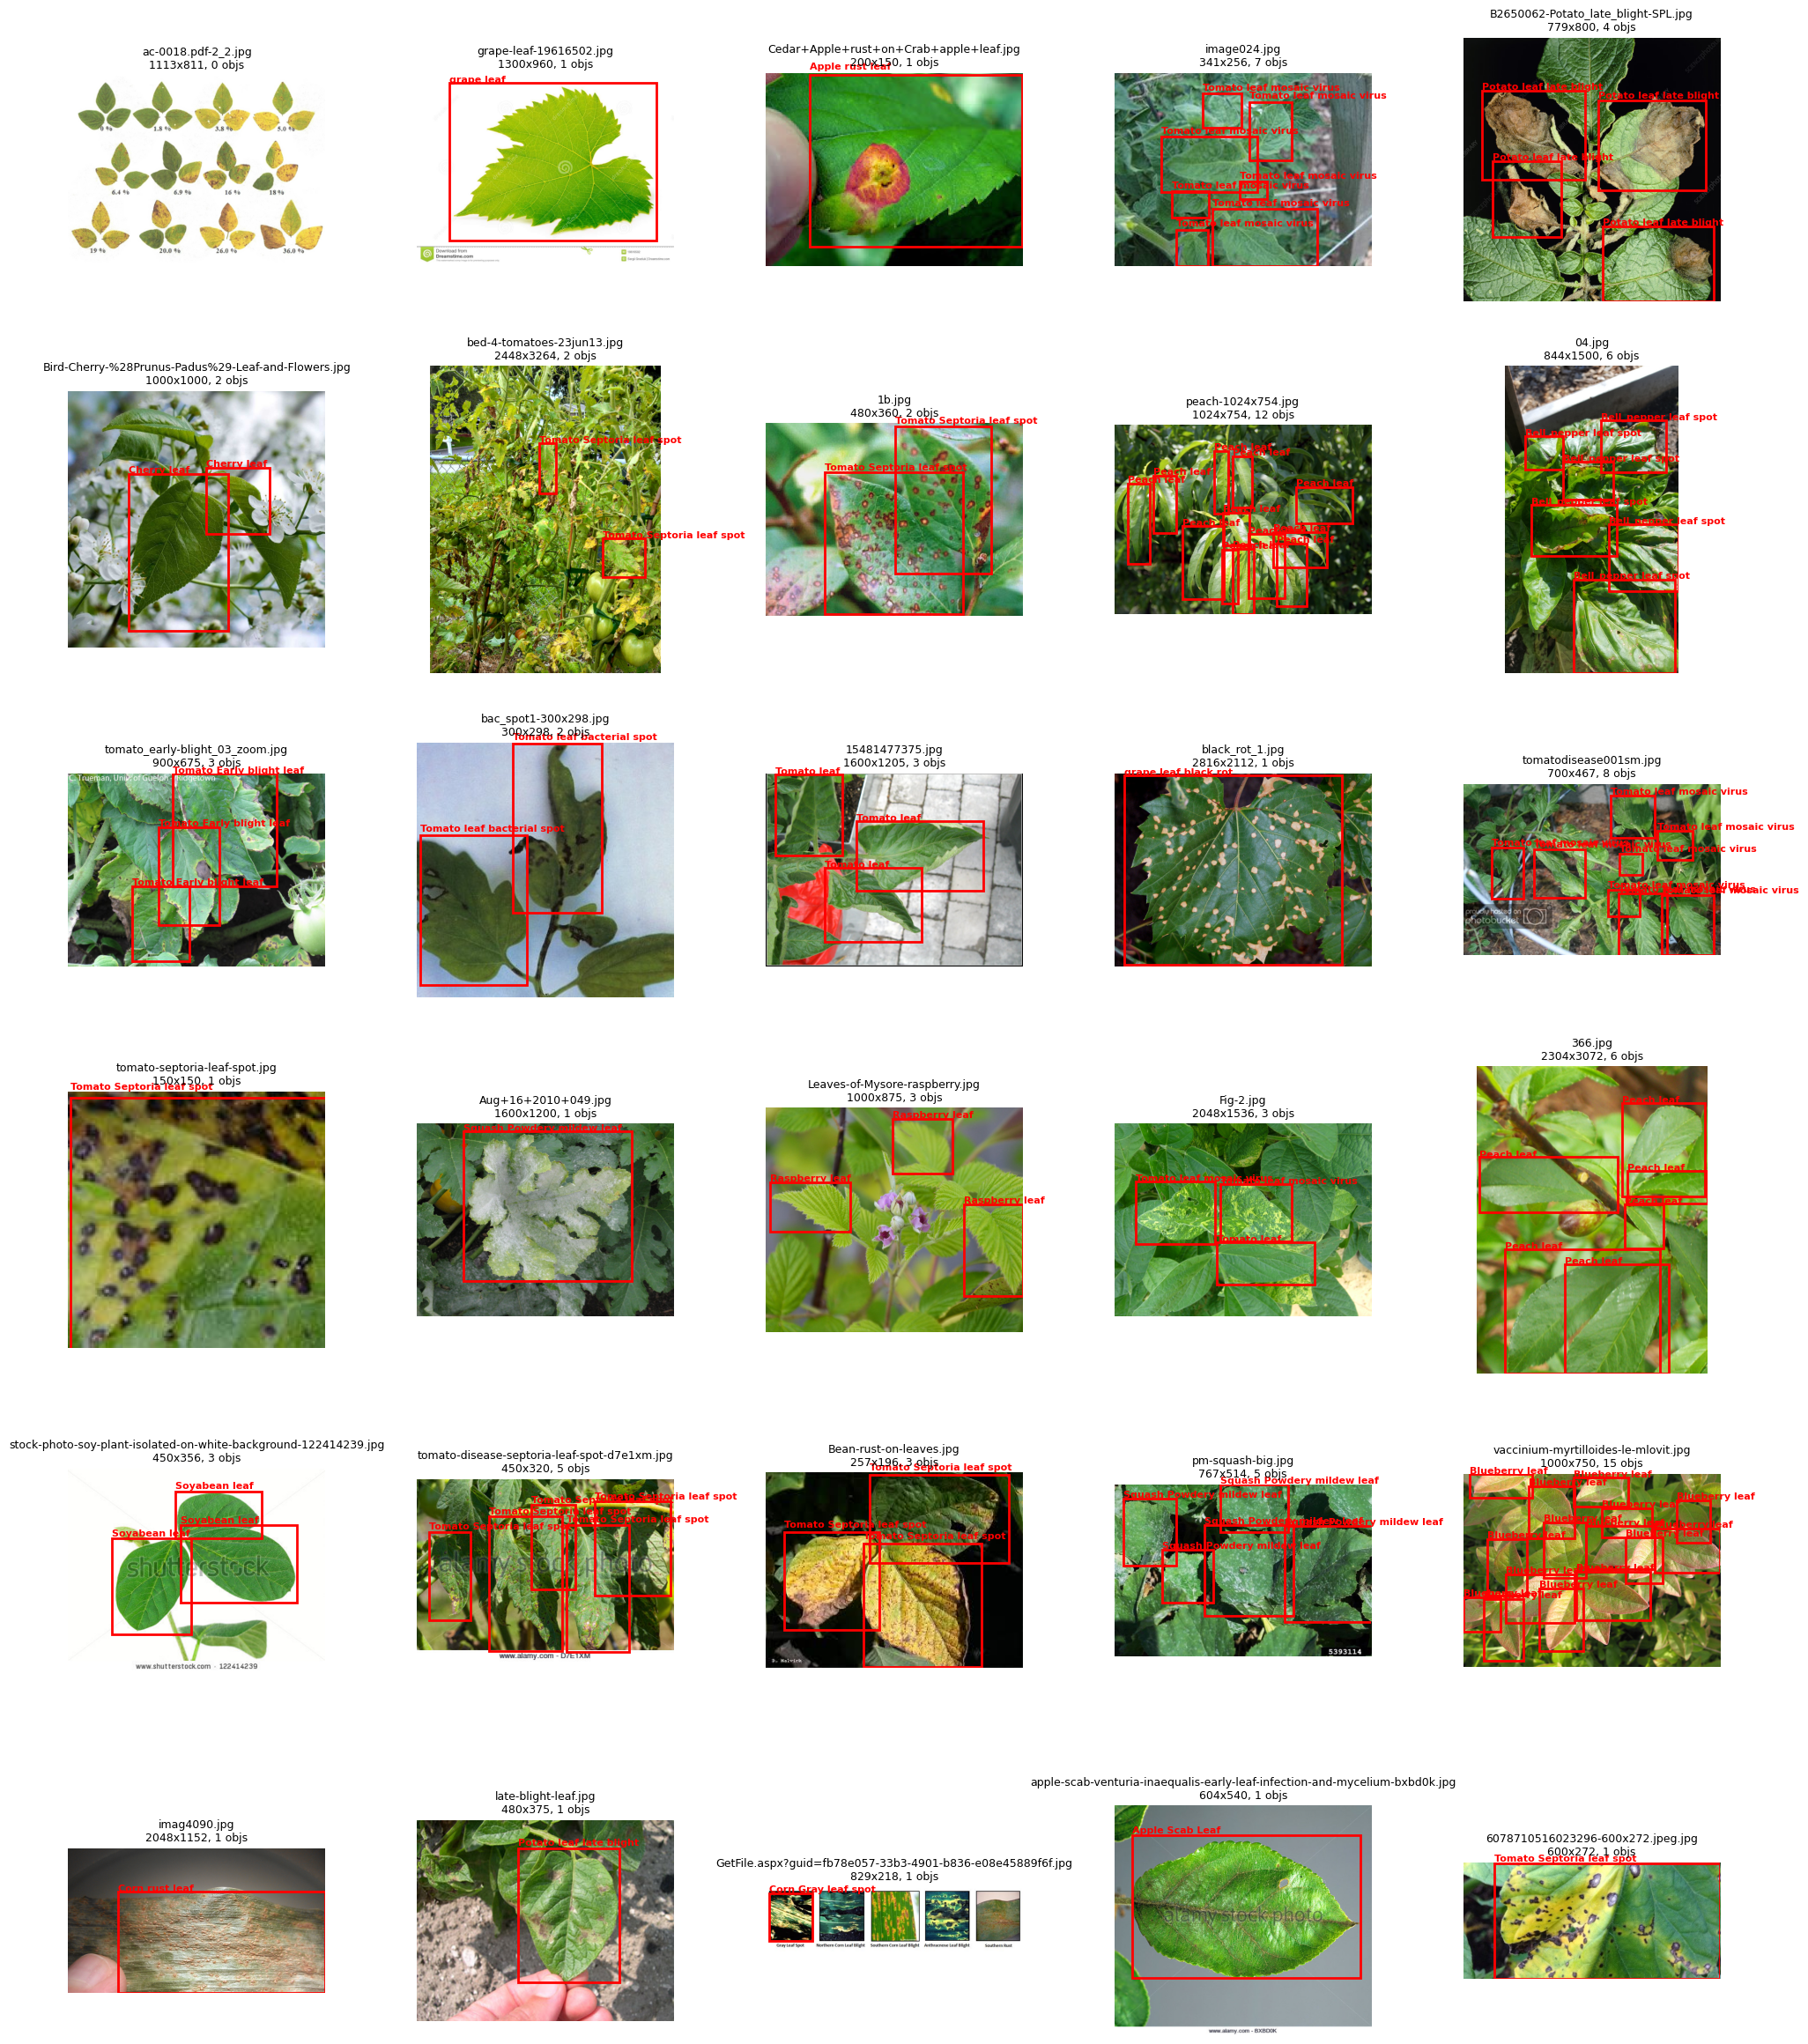

In [13]:
# set up the gril
cols = 5
rows = (len(sample_images) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, rows*4))
axes = axes.flatten()

for ax, img_file in zip(axes, sample_images):
    img_path = os.path.join(dataset_dir, img_file)
    img = Image.open(img_path)
    width, height = img.size

    # Lire annotations XML
    xml_file = img_file.replace(".jpg", ".xml")
    xml_path = os.path.join(dataset_dir, xml_file)

    annotations = []
    if os.path.exists(xml_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            name = obj.find('name').text
            bndbox = obj.find('bndbox')
            bbox = {
                'xmin': int(bndbox.find('xmin').text),
                'ymin': int(bndbox.find('ymin').text),
                'xmax': int(bndbox.find('xmax').text),
                'ymax': int(bndbox.find('ymax').text),
            }
            annotations.append({'label': name, 'bbox': bbox})

    # Afficher l'image
    ax.imshow(img)
    ax.set_title(f"{img_file}\n{width}x{height}, {len(annotations)} objs", fontsize=9)
    ax.axis('off')

    # Dessiner les bounding boxes
    for ann in annotations:
        bbox = ann['bbox']
        rect = patches.Rectangle(
            (bbox['xmin'], bbox['ymin']),
            bbox['xmax'] - bbox['xmin'],
            bbox['ymax'] - bbox['ymin'],
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(bbox['xmin'], bbox['ymin']-5, ann['label'], color='red', fontsize=8, weight='bold')

plt.tight_layout()
plt.show()

In [14]:
df["resolution"] = df['width'].astype(str) + "x" + df["height"].astype(str)

In [15]:
df["resolution"].value_counts()

resolution
1600x1200    313
1024x768     224
800x600      191
1000x750      91
1200x1600     84
            ... 
1501x997       1
504x335        1
765x257        1
450x387        1
550x586        1
Name: count, Length: 1377, dtype: int64

<Axes: xlabel='resolution', ylabel='Count'>

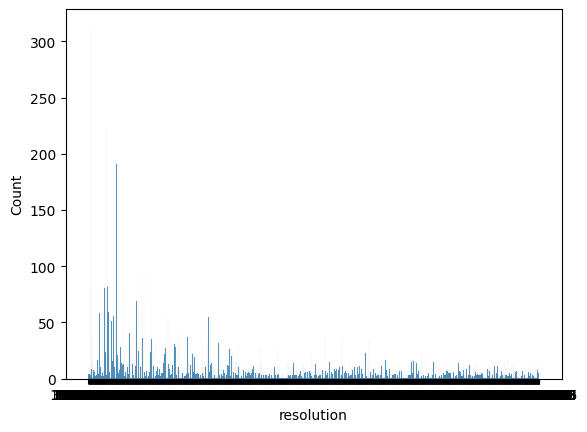

In [16]:
sns.histplot(df["resolution"])

# 2- Exploration to find any corupted data, invalid entries or missing files. 
## Double check and validate the integrity of the data

In [17]:
plant_species = ['Apple', 'Bell Pepper', 'Blueberry', 'Cherry', 'Corn', 'Grape', 'Peach', 'Potato', 'Raspberry', 'Soyabean', 'Squash', 'Strawberry', 'Tomato']

In [18]:
df['class'] = df['class'].str.replace('_', ' ')

In [19]:
df['class'].unique()

array(['Cherry leaf', 'Peach leaf', 'Corn leaf blight', 'Apple rust leaf',
       'Potato leaf late blight', 'Strawberry leaf', 'Corn rust leaf',
       'Tomato leaf late blight', 'Tomato mold leaf',
       'Potato leaf early blight', 'Apple leaf',
       'Tomato leaf yellow virus', 'Blueberry leaf',
       'Tomato leaf mosaic virus', 'Raspberry leaf',
       'Tomato leaf bacterial spot', 'Squash Powdery mildew leaf',
       'grape leaf', 'Corn Gray leaf spot', 'Tomato Early blight leaf',
       'Apple Scab Leaf', 'Tomato Septoria leaf spot', 'Tomato leaf',
       'Soyabean leaf', 'Bell pepper leaf spot', 'Bell pepper leaf',
       'grape leaf black rot', 'Potato leaf',
       'Tomato two spotted spider mites leaf'], dtype=object)

In [20]:
def extract_species(text):
    """
    Extracting the plan species from the string

    Arg : text
    return : plant species
    """
    for plant in plant_species:
        if re.search(rf"\b{plant}\b", text, flags=re.IGNORECASE):
            return plant

df['species'] = df['class'].apply(extract_species)

In [21]:
def extract_disease(text):
    """
    Extracting the plant disease

    Arg : text
    return : plant desease
    """
    for plant in plant_species:
        text = re.sub(rf"\b{plant}\b", "", text, flags=re.IGNORECASE)
    text = re.sub(r"\bleaf\b", "", text, flags=re.IGNORECASE).strip()
    return text if text else None

df["disease"] = df["class"].apply(extract_disease)


In [22]:
# Replace missing diseases with "healthy"
df["disease_filled"] = df["disease"].fillna("healthy")

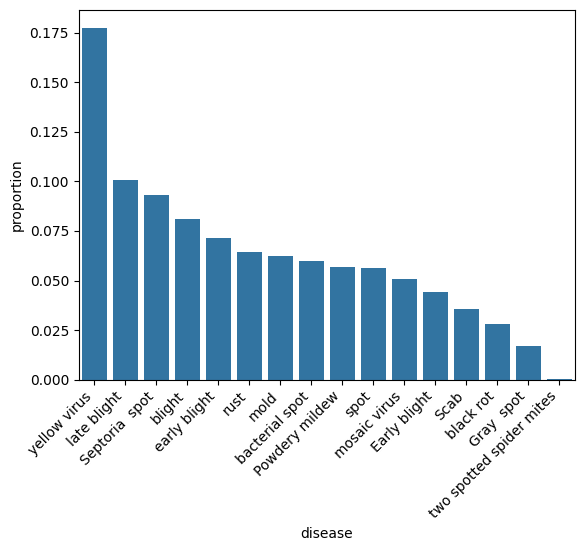

In [23]:
sns.barplot(df['disease'].value_counts(normalize=True))
plt.xticks(rotation=45, ha='right');

As we can see, yellow virus is over represented, and two spotter spider mites are way under represented. 
So we would maybe cut some yellow virus to make it more even, and just delete the two spotted

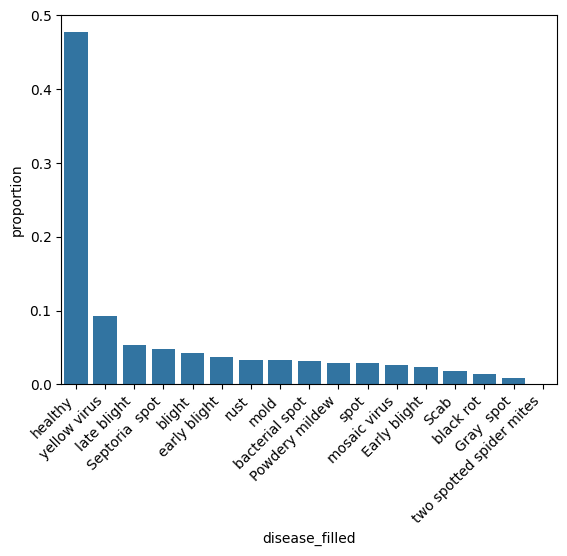

In [24]:
sns.barplot(df['disease_filled'].value_counts(normalize=True))
plt.xticks(rotation=45, ha='right');

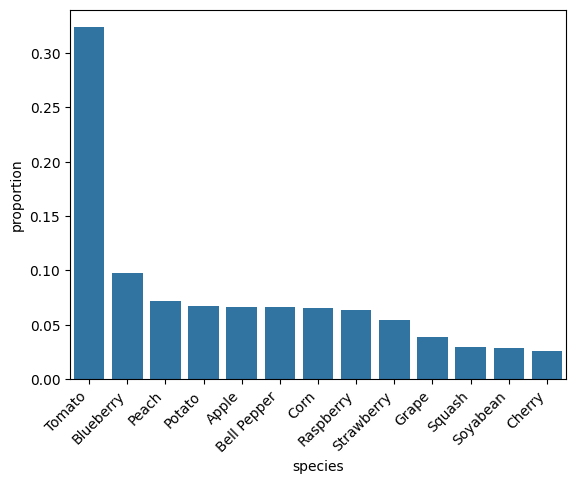

In [25]:
sns.barplot(df['species'].value_counts(normalize=True))
plt.xticks(rotation=45, ha='right');

In [26]:
# Count total number of disease entries per species
disease_counts = df.groupby("species")["disease_filled"].count().reset_index()
disease_counts = disease_counts.rename(columns={"disease": "num_diseases"})
disease_counts

species  disease_filled
0         Apple             563
1   Bell Pepper             561
2     Blueberry             827
3        Cherry             221
4          Corn             552
5         Grape             330
6         Peach             610
7        Potato             567
8     Raspberry             539
9      Soyabean             246
10       Squash             251
11   Strawberry             462
12       Tomato            2740

In [27]:
# Count number of occurrences of each disease per species
disease_distribution = df.groupby(["species", "disease_filled"]).size().reset_index(name="count")

# Calculate total per species
total_per_species = disease_distribution.groupby("species")["count"].transform("sum")

# Calculate percentage
disease_distribution["percentage"] = disease_distribution["count"] / total_per_species * 100

disease_distribution

species            disease_filled  count  percentage
0         Apple                      Scab    158   28.063943
1         Apple                   healthy    237   42.095915
2         Apple                      rust    168   29.840142
3   Bell Pepper                   healthy    312   55.614973
4   Bell Pepper                      spot    249   44.385027
5     Blueberry                   healthy    827  100.000000
6        Cherry                   healthy    221  100.000000
7          Corn                Gray  spot     75   13.586957
8          Corn                    blight    360   65.217391
9          Corn                      rust    117   21.195652
10        Grape                 black rot    125   37.878788
11        Grape                   healthy    205   62.121212
12        Peach                   healthy    610  100.000000
13       Potato              early blight    316   55.731922
14       Potato                   healthy     11    1.940035
15       Potato               late blight    240   42.328042
16    Raspberry                   healthy    539  100.000000
17     Soyabean                   healthy    246  100.000000
18       Squash            Powdery mildew    251  100.000000
19   Strawberry                   healthy    462  100.000000
20       Tomato              Early blight    195    7.116788
21       Tomato            Septoria  spot    412   15.036496
22       Tomato            bacterial spot    266    9.708029
23       Tomato                   healthy    369   13.467153
24       Tomato               late blight    207    7.554745
25       Tomato                      mold    277   10.109489
26       Tomato              mosaic virus    225    8.211679
27       Tomato  two spotted spider mites      2    0.072993
28       Tomato              yellow virus    787   28.722628

In [28]:
# Pivot table: diseases as columns, species as rows
disease_pivot = disease_distribution.pivot(index="species", columns="disease_filled", values="count").fillna(0)

# Convert counts to percentages per species
disease_percent = disease_pivot.div(disease_pivot.sum(axis=1), axis=0) * 100

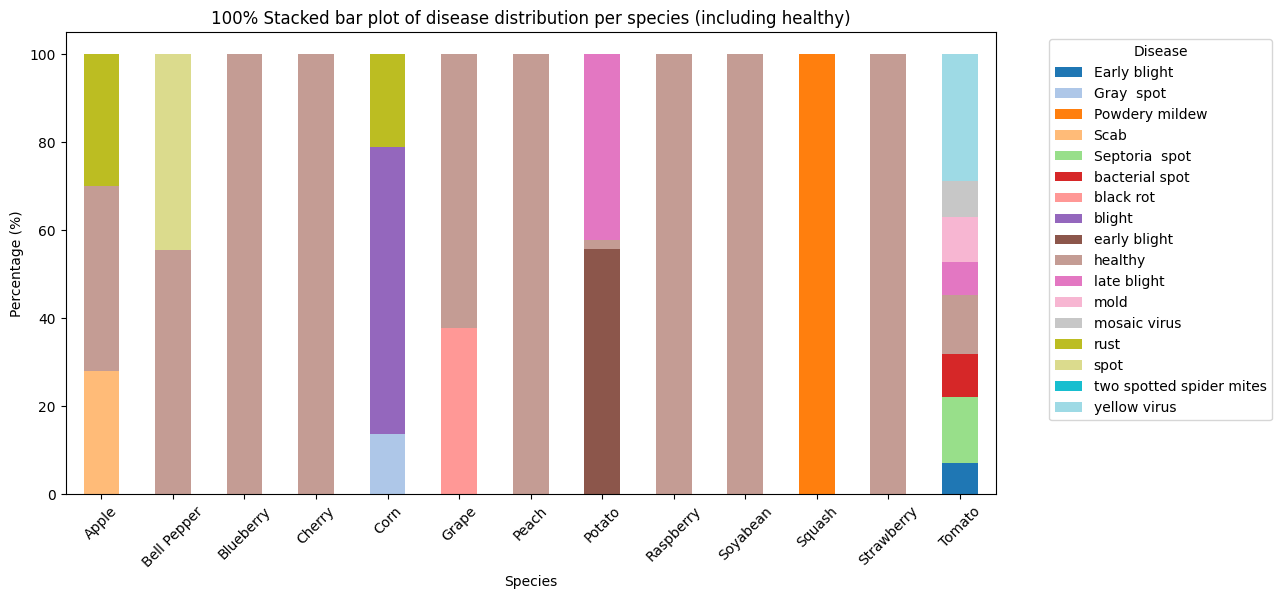

In [29]:
ax = disease_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    colormap="tab20"
)

plt.ylabel("Percentage (%)")
plt.xlabel("Species")
plt.title("100% Stacked bar plot of disease distribution per species (including healthy)")
plt.legend(title="Disease", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

As we can see, our data are well imbalenced.  
For our model, we will have two possibilities.  
1- either we don't care about reconize the species, and just focus on reconize disease.  
2- We want to reconize species as well, so we will need to get rid of all the species too much imbalanced, or that only have one "disease"